<a href="https://colab.research.google.com/github/PolChip/2course_python/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1: Анализ данных о студентах (ООП + работа с файлами)

Условие:


*   Cоздайте класс Student с атрибутами: name (имя), group (группа), grades (список оценок).
*   Реализуйте метод average_grade(), который возвращает средний балл студента.
*   В основной программе прочитайте данные из файла students.txt (формат: Имя;Группа;Оценка1,Оценка2,Оценка3), создайте список объектов Student.
*   Запишите в файл excellent_students.txt информацию о всех студентах-отличниках (каждая строка: Имя из файла - Группа).
*   Выведите на экран средний балл для каждой группы.

Цель: Повторение ООП (классы, методы, инкапсуляция), работа с файлами, обработка строк, базовые коллекции.



In [5]:
class Student:
    def __init__(self, name, group, grades): # name(строка с именем), group(строка с названием группы), grades(список целых чисел с оценками)
        self.name = name
        self.group = group
        self.grades = grades

    def average_grade(self):  # Вычисляем средний балл студента, если оценок нет, возвращаем 0 (чтобы избежать деления на ноль)
        if len(self.grades) == 0:
            return 0
        return sum(self.grades) / len(self.grades) # Сумму делим на кол-во

    def is_excellent(self): # Проверяем, является ли студент отличником. Возвращаем True если средний балл >= 4.5, иначе False
        return self.average_grade() >= 4.5

students = []  # Создаем пустой список для хранения объектов Student

with open('students.txt', 'r') as file: # Открываем файл для чтения ('r' - read)
    for line in file: # Читаем файл построчно
        line = line.strip() # Удаляем пробелы и переносы строк в начале и конце строки
        parts = line.split(';') # Разбиваем строку на части по ;

        # Извлекаем данные из частей
        name = parts[0]      # Первый элемент - имя
        group = parts[1]     # Второй элемент - группа
        # Третий элемент - строка с оценками через запятую
        grades = list(map(int, parts[2].split(','))) # list() список, map(int, ...) преобразует каждую строку в целое число,
        students.append(Student(name, group, grades)) # Создаем объект Student и добавляем в список студентов

# Запись отличников в файл
with open('excellent_students.txt', 'w') as file: # Открываем файл для записи ('w' - write, создаст новый или перезапишет существующий)
    for student in students: # Проходим по всем студентам в списке
        if student.is_excellent(): # Проверяем, является ли студент отличником
            file.write(f"{student.name} - {student.group}\n")  # Записываем строку в формате "Имя - Группа" с переносом на новую строку

# Вывод среднего балла для каждой группы
# Создаем словарь для хранения оценок по группам
# Ключ - название группы, значение - список средних баллов студентов этой группы
group_grades = {}

for student in students: # Проходим по всем студентам
    if student.group not in group_grades: # Если группы еще нет в словаре, создаем для нее пустой список
        group_grades[student.group] = []

    group_grades[student.group].append(student.average_grade()) # Добавляем средний балл текущего студента в список его группы

# Выводим результаты для каждой группы
for group, grades in group_grades.items(): # items() возвращает пары (ключ, значение) из словаря
    avg = sum(grades) / len(grades) # Вычисляем средний балл для группы

    print(f"Группа {group}: {avg:.2f}") # Выводим результат с округлением до 2 знаков после запятой

Группа ИТ-21: 4.73
Группа ФИЗ-22: 4.00
Группа ХИМ-23: 4.80
Группа МАТ-20: 3.50


Задача 2: Обработка логов с помощью регулярных выражений

Условие:
Дан многострочный текст-лог (например, вывод команды или журнал работы сервера). Напишите скрипт, который используя регулярные выражения:


*   Находит все IPv4 адреса.
*   Находит все временные метки в формате YYYY-MM-DD HH:MM:SS.
*   Находит все слова, написанные в UPPERCASE.
*   Задание повышенной сложности: Заменяет все найденные email-адреса на [EMAIL PROTECTED].

Цель: Повторение модуля re (поиск, захват групп, компиляция шаблонов).


In [21]:
import re

# Исходный текст с логами для анализа
log_text = """
2023-10-15 14:30:25 - SERVER STARTED on IP 192.168.1.1
2023-10-15 14:31:10 - User ADMIN logged in from 10.0.0.5
2023-10-15 14:32:45 - ERROR: Connection timeout from 172.16.254.3
2023-10-15 14:33:20 - WARNING: High CPU usage detected!
2023-10-15 14:34:05 - Email sent to user@example.com and admin@server.com
2023-10-15 14:35:00 - CRITICAL: SYSTEM SHUTDOWN initiated by ROOT
2023-11-20 09:15:30 - Backup completed to FTP server 203.0.113.10
"""

print("Исходный текст логов:")
print(log_text)

# 1. Поиск IPv4 адресов
print("\n1. Найденные IPv4 адреса:")
ip_pattern = r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b' # Шаблон для IPv4: 4 числа от 0 до 255, разделенные точками
ip_addresses = re.findall(ip_pattern, log_text) # re.findall() ищет все совпадения с шаблоном в тексте
i = 1
for ip in ip_addresses:
    print(f"  {i}. {ip}") # i - номер строки, ip - IP-адрес
    i += 1

# 2. Поиск временных меток в формате YYYY-MM-DD HH:MM:SS
print("\n2. Найденые временные метки:")
timestamp_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}' # Шаблон для даты и времени: YYYY-MM-DD HH:MM:SS
timestamps = re.findall(timestamp_pattern, log_text) # re.findall() ищет все совпадения с шаблоном в тексте
i = 1
for timestamp in timestamps:
    print(f"  {i}. {timestamp}") # i - текущий номер, timestamp - временная метка
    i += 1

# 3. Поиск слов в UPPERCASE
print("\n3. Найдение слова в uppercase:")
uppercase_pattern = r'\b[A-Z][A-Z]+\b' # Шаблон для слов из заглавных букв: \b - граница слова, [A-Z]+ - одна или более заглавных букв
uppercase_words = re.findall(uppercase_pattern, log_text) # re.findall() ищет все совпадения с шаблоном в тексте
i = 1
for word in uppercase_words:
    print(f"  {i}. {word}") # i - номер строки, word - подставляет текущее слово из списка
    i += 1

# 4. Замена email-адресов
print("\n4. Замена email-адресов на [email protected]:")
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b' # Шаблон для email: имя@домен.расширение
protected_text = re.sub(email_pattern, '[email protected]', log_text) # sub() заменяет все найденные email на указанный текст
print("Текст после замены email:")
print(protected_text)


Исходный текст логов:

2023-10-15 14:30:25 - SERVER STARTED on IP 192.168.1.1
2023-10-15 14:31:10 - User ADMIN logged in from 10.0.0.5
2023-10-15 14:32:45 - ERROR: Connection timeout from 172.16.254.3
2023-10-15 14:33:20 - WARNING: High CPU usage detected!
2023-10-15 14:34:05 - Email sent to user@example.com and admin@server.com
2023-10-15 14:35:00 - CRITICAL: SYSTEM SHUTDOWN initiated by ROOT
2023-11-20 09:15:30 - Backup completed to FTP server 203.0.113.10


1. Найденные IPv4 адреса:
  1. 192.168.1.1
  2. 10.0.0.5
  3. 172.16.254.3
  4. 203.0.113.10

2. Найденые временные метки:
  1. 2023-10-15 14:30:25
  2. 2023-10-15 14:31:10
  3. 2023-10-15 14:32:45
  4. 2023-10-15 14:33:20
  5. 2023-10-15 14:34:05
  6. 2023-10-15 14:35:00
  7. 2023-11-20 09:15:30

3. Найдение слова в uppercase:
  1. SERVER
  2. STARTED
  3. IP
  4. ADMIN
  5. ERROR
  6. WARNING
  7. CPU
  8. CRITICAL
  9. SYSTEM
  10. SHUTDOWN
  11. ROOT
  12. FTP

4. Замена email-адресов на [email protected]:
Текст после замены 

Задача 3: Валидация и преобразование данных с Pandas

Условие:


*   Создайте DataFrame df из словаря с данными о продажах. В данных намеренно есть пропуски (NaN) и выбросы.
*   Заполните пропуски в столбце 'Цена' медианным значением.
*   Найдите и удалите строки, в которых количество ('Количество') является выбросом (например, меньше 1 или больше 1000).
*   Создайте новый столбец 'Общая_стоимость' = 'Цена' * 'Количество'.
*   Сгруппируйте данные по 'Товар' и посчитайте суммарную выручку по каждому товару.
*   Постройте столбчатую диаграмму (bar plot) для полученной выручки по товарам.

Цель: Повторение pandas (создание DF, обработка пропусков, фильтрация, создание столбцов, группировка) и matplotlib (построение простых графиков).




1: Создание DataFrame :)
Исходный DataFrame:
       Товар   Цена  Количество
0     Яблоки   50.0          10
1     Бананы   80.0           5
2  Апельсины    NaN           8
3      Манго  120.0           3
4      Груши   55.0          15
5  Мандарины   85.0          -2
6       Киви   90.0        2000
7      Арбуз    NaN           6
8       Дыня   60.0          12

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Товар       9 non-null      object 
 1   Цена        7 non-null      float64
 2   Количество  9 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 348.0+ bytes
None

 2: Заполнение пропусков в цене 
Медианная цена: 80.0

DataFrame после заполнения пропусков:
       Товар   Цена  Количество
0     Яблоки   50.0          10
1     Бананы   80.0           5
2  Апельсины   80.0           8
3      Манго  

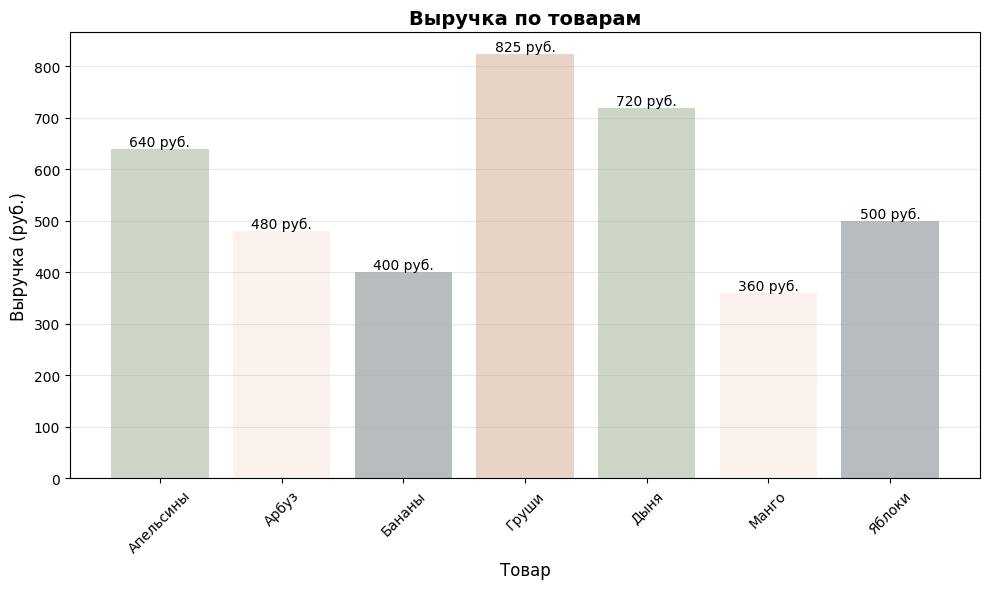

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Создаем dataframe из словаря с данными о продажах
print("1: Создание DataFrame :)")

# Создаем словарь с данными о продажах (с намеренными пропусками и выбросами)
data = {
    'Товар': ['Яблоки', 'Бананы', 'Апельсины', 'Манго', 'Груши', 'Мандарины', 'Киви', 'Арбуз', 'Дыня'],
    'Цена': [50, 80, np.nan, 120, 55, 85, 90, np.nan, 60],  # Пропуски: NaN
    'Количество': [10, 5, 8, 3, 15, -2, 2000, 6, 12]  # Выбросы: -2 и 2000
}

# Создаем DataFrame из словаря
df = pd.DataFrame(data)
print("Исходный DataFrame:")
print(df)
print("\nИнформация о данных:")
print(df.info())

# 2. Запрлнение пропусков в столбце 'Цена' медианным значением
print("\n 2: Заполнение пропусков в цене ")

median_price = df['Цена'].median() # Вычисляем медианное значение цены (игнорируя NaN)
print(f"Медианная цена: {median_price}")

df['Цена'] = df['Цена'].fillna(median_price) # Заполняем пропуски медианным значением
print("\nDataFrame после заполнения пропусков:")
print(df)

# 3. Поиск и удаление строк с выбрасами в кол-во
print("\n3: Удаление выбросов в количестве ")

outliers_mask = (df['Количество'] < 1) | (df['Количество'] > 1000) # Определяем выбросы: количество < 1 или > 1000
print("Строки с выбросами (маска):")
print(outliers_mask)

print("\nСтроки с выбросами (данные):")
print(df[outliers_mask])

# Удаляем строки с выбросами
initial_rows = len(df) # Сохраняем кол-во строк (DataFrame) для последующего сравнения
df = df[~outliers_mask]  # (~  инверсия) outliers_mask булева маска (True/False), которая отмечает выбросы
final_rows = len(df) # После фильтрации снова считаем количество строк

print(f"\nУдалено строк с выбросами: {initial_rows - final_rows}") # (initial_rows - final_rows) вычисляем, сколько строк было удалено
print("DataFrame после удаления выбросов:")
print(df)

# 4. Создание нового столбца 'Общая_стоимость'
print("\n4: Создание столбца 'Общая_стоимость' ")

df['Общая_стоимость'] = df['Цена'] * df['Количество']
print("DataFrame с новым столбцом:")
print(df)

# 5. Групировка данных по товарам и расчет суммарной выручки
print("\n5: Группировка по товарам ")

revenue_by_product = df.groupby('Товар')['Общая_стоимость'].sum() # Группируем по столбцу 'Товар' и суммируем общую стоимость
print("Суммарная выручка по товарам:")
print(revenue_by_product)

# 6. Построение столбчатой диаграммы
print("\n6: Построение диаграммы ")

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))  # Задаем размер графика

# Настраиваим внешний вид
vneshka = plt.bar(revenue_by_product.index, revenue_by_product.values,
               color=['#CDD5C6', '#FBF2ED', '#B7BCBF', '#E8D4C6'])

# Добавляем подписи значений на столбцах
for bar in vneshka:
    height = bar.get_height() # возвращаем его высоту (числовое значение)
    plt.text(bar.get_x() + bar.get_width()/2., # вычисляем центр столбца
             height,
             f'{height:.0f} руб.', # 0f (0 знаков после запятой)
             ha='center', va='bottom') # ровняем сумму над столбцами

# Настраиваем внешний вид графика
plt.title('Выручка по товарам', fontsize=14, fontweight='bold')
plt.xlabel('Товар', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)
plt.grid(axis='y', alpha=0.3)  # Добавляем сетку по оси Y

plt.xticks(rotation=45) # Поворачиваем подписи под столбцами для красоты
plt.tight_layout() # Автоматически подбираем отступы для красивого отображения
plt.show()




Задача 4: Научные вычисления с NumPy

Условие:

    Сгенерируйте два случайных двумерных массива (матрицы) A и B размером 5x5 с целыми числами в диапазоне от 1 до 10.

    Вычислите:


*   Поэлементное произведение матриц.
*   Матричное произведение.
*   Определитель матрицы A.
*   Транспонированную матрицу B.
*   Обратную матрицу для A (если это возможно, иначе вывести сообщение).


    Решите систему линейных уравнений: A * x = C, где C — вектор-столбец сумм строк матрицы A.

Цель: Повторение numpy (создание массивов, базовые операции, линейная алгебра).


In [8]:
import numpy as np

# 1. Генерация случайных матриц
print("1. Генерация матриц A и B размером 5x5")

# Создаем матрицу A 5x5 со случайными целыми числами от 1 до 10
A = np.random.randint(1, 11, size=(5, 5))
print("Матрица A:")
print(A)
print(f"Размер матрицы A: {A.shape}\n")

# Создаем матрицу B 5x5 со случайными целыми числами от 1 до 10
B = np.random.randint(1, 11, size=(5, 5))
print("Матрица B:")
print(B)
print(f"Размер матрицы B: {B.shape}\n")

# 2. Поэлементное произведение матриц
print("2. оэлементное произведение (A * B)")
elementwise_product = A * B # Поэлементное умножение (умножение Адамара)
print("Результат поэлементного умножения:")
print(elementwise_product)
print(f"Размер результата: {elementwise_product.shape}\n")

# 3. Матричное произведение
print("3. Матричное произведение (A @ B)")
# Матричное умножение (скалярное произведение(умножения строк на столбцы))
matrix_product = A @ B  # Каждая строка матрицы A умножается скалярно на каждый столбец матрицы B.
print("Результат матричного умножения:")
print(matrix_product)
print(f"Размер результата: {matrix_product.shape}\n")

# 4. Определитель матрицы A
print("4. Определитель матрицы A")
# Определитель (скалярное значение, которое характеризует свойства квадратной матрицы) матрицы
det_A = np.linalg.det(A)
print(f"Определитель матрицы A: {det_A:.2f}") # форматирование числа с плавающей точкой(2 кол-во знаков после запятой)
print(f"Определитель (целое число): {int(round(det_A))}\n") # round(det_A) - округляет до ближайшего целого

# 5. Транспонированная матрица B
print("5. Транспонированная матрица B")
B_transposed = B.T  # Эквивалентно np.transpose(B) # Транспонирование (строки становятся столбцами и наоборот)
print("Транспонированная матрица B:")
print(B_transposed)
print(f"Размер транспонированной матрицы: {B_transposed.shape}\n")

# 6. Обратная матрица для A
print("6. Обратная матрица для A")
# Обратная матрица существует только если определитель ≠ 0
if abs(det_A) > 1e-10:  # Из-за погрешностей вычислений с плавающей точкой, det может быть очень близок к 0, но не точно 0)
    A_inverse = np.linalg.inv(A)
    print("Обратная матрица A^-1:")
    print(A_inverse)

    identity_check = A @ A_inverse # Умножаем исходную матрицу на обратную(должена получиться единичная матрица)
    print("\nПроверка (A * A^-1, округлено до 2 знаков):")
    print(np.round(identity_check, 2))
else:
    print("Обратная матрица не существует, т.к. определитель = 0")
print()

# 7. Решение системы линейных уравнений A * x = C
print("7. Решение системы линейных уравнений A * x = C")

# Создаем вектор C как сумму строк матрицы A
C = np.sum(A, axis=1)  # axis=1 суммирование по строкам
print("Вектор C (суммы строк матрицы A):")
print(C)
print(f"Размер вектора C: {C.shape}")

# Преобразуем C в вектор-столбец (5x1 вместо 5)
C = C.reshape(-1, 1)  # -1 автоматически определить размер (изменяет форму без изменения данных.)
print("Вектор-столбец C:")
print(C)
print(f"Размер вектора-столбца C: {C.shape}\n") # shape возвращает кортеж с размерами

# Решаем систему уравнений A * x = C
try:
    x = np.linalg.solve(A, C) # требует вектор-столбец, а не вектор-строку
    print("Решение системы уравнений (вектор x):")
    print(x)
    print(f"Размер решения x: {x.shape}")

    # Проверка решения: A * x должно равняться C
    check_solution = A @ x
    print("\nПроверка решения (A * x, должно равняться C):")
    print("A * x =")
    print(check_solution)
    print("C =")
    print(C)
    print("Разница (ошибка):")
    print(np.round(check_solution - C, 10))#check_solution(результат умножения матрицы на найденное решение).Округляем для устранения погрешностей

except np.linalg.LinAlgError:
    print("Система уравнений не имеет решения или матрица A вырожденная")


1. Генерация матриц A и B размером 5x5
Матрица A:
[[ 8  9 10  6  7]
 [ 8  4  2  8  9]
 [ 1 10 10  4  8]
 [ 5  3  2  9  4]
 [ 1  9  9  6  2]]
Размер матрицы A: (5, 5)

Матрица B:
[[ 4  7 10  6  3]
 [ 4  1  6  8  1]
 [ 4  6  2  4  5]
 [10  2  6  2 10]
 [ 6  2  6  1 10]]
Размер матрицы B: (5, 5)

2. оэлементное произведение (A * B)
Результат поэлементного умножения:
[[ 32  63 100  36  21]
 [ 32   4  12  64   9]
 [  4  60  20  16  40]
 [ 50   6  12  18  40]
 [  6  18  54   6  20]]
Размер результата: (5, 5)

3. Матричное произведение (A @ B)
Результат матричного умножения:
[[210 151 232 179 213]
 [190 106 210 113 208]
 [172 101 162 142 183]
 [154  76 150  84 158]
 [148  86 130 128 137]]
Размер результата: (5, 5)

4. Определитель матрицы A
Определитель матрицы A: -3933.00
Определитель (целое число): -3933

5. Транспонированная матрица B
Транспонированная матрица B:
[[ 4  4  4 10  6]
 [ 7  1  6  2  2]
 [10  6  2  6  6]
 [ 6  8  4  2  1]
 [ 3  1  5 10 10]]
Размер транспонированной матрицы: (5,

Задача 5: Комплексная функция с обработкой исключений и лямбдой

Условие:
Напишите функцию safe_apply(func, data), которая:

*   Принимает другую функцию func и список data.
*   Пытается применить функцию func к каждому элементу списка data.
*   Если применение приводит к исключению (например, ValueError TypeError), элемент добавляется в специальный список errors с указанием типа ошибки.
*   Функция возвращает кортеж (results, errors), где results — список успешных результатов, errors — список кортежей (element, exception).
*   Продемонстрируйте работу функции, передав ей лямбда-функцию, вычисляющую квадратный корень, и список ['4', '16', 'text', '-25', '9.0'].


Цель: Повторение продвинутых тем: функции как объекты первого класса, обработка исключений, лямбда-функции, работа со списками.


In [7]:
def safe_apply(func, data): # Безопасно применяет функцию к каждому элементу списка. Возвращает кортеж (успешные_результаты, список_ошибок)
    results = []  # для успешных результатов
    errors = []   # для ошибок в формате (элемент, исключение)

    for item in data:
        try:
            result = func(item) # Пытаемся применить функцию к элементу
            results.append(result)
        except Exception as e:
            errors.append((item, e)) # Если ошибка - сохраняем элемент и исключение
    a=(results, errors)
    return a

print("Демонстрация safe_apply")

sqrt_func = lambda x: float(x) ** 0.5 # Лямбда-функция для квадратного корня (только для неотрицательных чисел)

test_data = ['4', '16', 'text', '-25', '9.0'] # Тестовые данные

print(f"Функция: {sqrt_func}")
print(f"Данные: {test_data}")

# Применяем safe_apply
print(safe_apply(sqrt_func, test_data))


Демонстрация safe_apply
Функция: <function <lambda> at 0x793e28c779c0>
Данные: ['4', '16', 'text', '-25', '9.0']
([2.0, 4.0, (3.061616997868383e-16+5j), 3.0], [('text', ValueError("could not convert string to float: 'text'"))])
